In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
# Data generators with rescaling
train_datagen_with_aug = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/Users/hardikchhipa/Desktop/DR-Arvind/Aravind eye dataset/aptos2019-blindness-detection/train_split',
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/Users/hardikchhipa/Desktop/DR-Arvind/Aravind eye dataset/aptos2019-blindness-detection/train_split',
    target_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3298 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [5]:
# Functional API for building the model
input_img = Input(shape=(224, 224, 3))
resnet = ResNet152V2(weights='imagenet', include_top=False, input_tensor=input_img)

# Freeze layers in DenseNet121
for layer in resnet.layers:
    layer.trainable = False

# Add custom layers on top of DenseNet121
x = Flatten()(resnet.output)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
output = Dense(5, activation='softmax')(x)

# Construct the model
model = Model(inputs=input_img, outputs=output)

# Summary of the model
# model.summary()

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m, f1_m])

# Train the model
graph = model.fit(train_generator, epochs=25, validation_data=validation_generator)

# Save the model
# model.save("/Users/hardikchhipa/Desktop/DR-Arvind/saved_models/used_models/densenet_121.h5")

# Print the results
print(graph.history)

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-05 17:23:38.849708: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 17:23:48.191131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1054s 10s/step - accuracy: 0.6075 - f1_m: 0.5972 - loss: 12.2504 - precision_m: 0.6094 - recall_m: 0.5900 - val_accuracy: 0.6841 - val_f1_m: 0.7013 - val_loss: 0.8514 - val_precision_m: 0.7363 - val_recall_m: 0.6701
Epoch 2/25


2024-09-05 17:41:04.319382: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-05 17:41:11.595229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1017s 10s/step - accuracy: 0.7687 - f1_m: 0.7678 - loss: 0.7252 - precision_m: 0.8009 - recall_m: 0.7385 - val_accuracy: 0.7033 - val_f1_m: 0.6879 - val_loss: 0.8872 - val_precision_m: 0.7146 - val_recall_m: 0.6641
Epoch 3/25


2024-09-05 17:57:59.452267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 17:58:09.806559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 946s 9s/step - accuracy: 0.7740 - f1_m: 0.7700 - loss: 0.6945 - precision_m: 0.7993 - recall_m: 0.7438 - val_accuracy: 0.7335 - val_f1_m: 0.7364 - val_loss: 0.7077 - val_precision_m: 0.7967 - val_recall_m: 0.6858
Epoch 4/25


2024-09-05 18:13:45.734335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 18:13:57.508102: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 934s 9s/step - accuracy: 0.8275 - f1_m: 0.8273 - loss: 0.5044 - precision_m: 0.8605 - recall_m: 0.7990 - val_accuracy: 0.7500 - val_f1_m: 0.7490 - val_loss: 0.7650 - val_precision_m: 0.7989 - val_recall_m: 0.7057
Epoch 5/25


2024-09-05 18:29:20.516304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 18:29:31.788312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 941s 9s/step - accuracy: 0.8425 - f1_m: 0.8434 - loss: 0.4556 - precision_m: 0.8729 - recall_m: 0.8167 - val_accuracy: 0.7830 - val_f1_m: 0.7872 - val_loss: 0.7547 - val_precision_m: 0.8086 - val_recall_m: 0.7674
Epoch 6/25


2024-09-05 18:45:01.143860: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-05 18:45:09.899172: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 928s 9s/step - accuracy: 0.8777 - f1_m: 0.8776 - loss: 0.3806 - precision_m: 0.8936 - recall_m: 0.8627 - val_accuracy: 0.7637 - val_f1_m: 0.7729 - val_loss: 0.8885 - val_precision_m: 0.7910 - val_recall_m: 0.7561
Epoch 7/25


2024-09-05 19:00:28.654251: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 19:00:38.275697: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 942s 9s/step - accuracy: 0.9035 - f1_m: 0.9067 - loss: 0.2850 - precision_m: 0.9230 - recall_m: 0.8916 - val_accuracy: 0.7775 - val_f1_m: 0.7766 - val_loss: 0.8631 - val_precision_m: 0.7967 - val_recall_m: 0.7578
Epoch 8/25


2024-09-05 19:16:11.750128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-05 19:16:19.923237: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1006s 9s/step - accuracy: 0.9224 - f1_m: 0.9234 - loss: 0.2468 - precision_m: 0.9331 - recall_m: 0.9141 - val_accuracy: 0.7555 - val_f1_m: 0.7574 - val_loss: 0.8601 - val_precision_m: 0.7829 - val_recall_m: 0.7344
Epoch 9/25


2024-09-05 19:32:57.313646: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 19:33:07.185152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 934s 9s/step - accuracy: 0.9342 - f1_m: 0.9337 - loss: 0.2362 - precision_m: 0.9434 - recall_m: 0.9246 - val_accuracy: 0.7720 - val_f1_m: 0.7672 - val_loss: 1.1895 - val_precision_m: 0.7744 - val_recall_m: 0.7604
Epoch 10/25


2024-09-05 19:48:31.889901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 19:48:43.303069: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 922s 9s/step - accuracy: 0.9196 - f1_m: 0.9218 - loss: 0.2166 - precision_m: 0.9286 - recall_m: 0.9153 - val_accuracy: 0.7967 - val_f1_m: 0.8010 - val_loss: 0.8845 - val_precision_m: 0.8063 - val_recall_m: 0.7960
Epoch 11/25


2024-09-05 20:03:53.168564: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 20:04:03.547638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1003s 9s/step - accuracy: 0.9425 - f1_m: 0.9421 - loss: 0.1836 - precision_m: 0.9487 - recall_m: 0.9358 - val_accuracy: 0.7582 - val_f1_m: 0.7514 - val_loss: 0.9167 - val_precision_m: 0.7650 - val_recall_m: 0.7387
Epoch 12/25


2024-09-05 20:20:36.620386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 20:20:45.620135: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1123s 11s/step - accuracy: 0.9441 - f1_m: 0.9438 - loss: 0.1777 - precision_m: 0.9479 - recall_m: 0.9399 - val_accuracy: 0.7555 - val_f1_m: 0.7593 - val_loss: 0.9585 - val_precision_m: 0.7720 - val_recall_m: 0.7474
Epoch 13/25


2024-09-05 20:39:18.734886: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 20:39:28.825086: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1041s 10s/step - accuracy: 0.9418 - f1_m: 0.9435 - loss: 0.1960 - precision_m: 0.9488 - recall_m: 0.9384 - val_accuracy: 0.7802 - val_f1_m: 0.7856 - val_loss: 1.0864 - val_precision_m: 0.7911 - val_recall_m: 0.7804
Epoch 14/25


2024-09-05 20:56:39.189589: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 20:56:49.538607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1003s 9s/step - accuracy: 0.9447 - f1_m: 0.9434 - loss: 0.1958 - precision_m: 0.9469 - recall_m: 0.9400 - val_accuracy: 0.7857 - val_f1_m: 0.7838 - val_loss: 0.9552 - val_precision_m: 0.7891 - val_recall_m: 0.7786
Epoch 15/25


2024-09-05 21:13:23.985243: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 3 of 8
2024-09-05 21:13:36.560526: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1216s 11s/step - accuracy: 0.9504 - f1_m: 0.9513 - loss: 0.1766 - precision_m: 0.9541 - recall_m: 0.9486 - val_accuracy: 0.7665 - val_f1_m: 0.7687 - val_loss: 1.1240 - val_precision_m: 0.7773 - val_recall_m: 0.7604
Epoch 16/25


2024-09-05 21:33:38.269309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 21:33:48.200953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1014s 10s/step - accuracy: 0.9316 - f1_m: 0.9343 - loss: 0.2111 - precision_m: 0.9397 - recall_m: 0.9290 - val_accuracy: 0.7555 - val_f1_m: 0.7565 - val_loss: 1.0962 - val_precision_m: 0.7662 - val_recall_m: 0.7474
Epoch 17/25


2024-09-05 21:50:32.519927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 21:50:43.176671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 989s 9s/step - accuracy: 0.9372 - f1_m: 0.9388 - loss: 0.1922 - precision_m: 0.9442 - recall_m: 0.9336 - val_accuracy: 0.7802 - val_f1_m: 0.7874 - val_loss: 1.0442 - val_precision_m: 0.7948 - val_recall_m: 0.7804
Epoch 18/25


2024-09-05 22:07:02.395400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 22:07:13.533298: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 881s 8s/step - accuracy: 0.9530 - f1_m: 0.9546 - loss: 0.1489 - precision_m: 0.9576 - recall_m: 0.9518 - val_accuracy: 0.7747 - val_f1_m: 0.7584 - val_loss: 1.0795 - val_precision_m: 0.7664 - val_recall_m: 0.7509
Epoch 19/25


2024-09-05 22:21:41.659597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 22:21:51.254662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 870s 8s/step - accuracy: 0.9650 - f1_m: 0.9664 - loss: 0.1065 - precision_m: 0.9679 - recall_m: 0.9650 - val_accuracy: 0.7637 - val_f1_m: 0.7704 - val_loss: 1.2093 - val_precision_m: 0.7735 - val_recall_m: 0.7674
Epoch 20/25


2024-09-05 22:36:13.358736: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 22:36:25.605156: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 963s 9s/step - accuracy: 0.9544 - f1_m: 0.9565 - loss: 0.1582 - precision_m: 0.9594 - recall_m: 0.9536 - val_accuracy: 0.7527 - val_f1_m: 0.7461 - val_loss: 1.1462 - val_precision_m: 0.7551 - val_recall_m: 0.7378
Epoch 21/25


2024-09-05 22:52:14.807491: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-05 22:52:22.932087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1023s 10s/step - accuracy: 0.9532 - f1_m: 0.9552 - loss: 0.1675 - precision_m: 0.9574 - recall_m: 0.9530 - val_accuracy: 0.7775 - val_f1_m: 0.7756 - val_loss: 1.0434 - val_precision_m: 0.7918 - val_recall_m: 0.7604
Epoch 22/25


2024-09-05 23:09:18.640149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 23:09:29.993150: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1041s 10s/step - accuracy: 0.9664 - f1_m: 0.9688 - loss: 0.0994 - precision_m: 0.9723 - recall_m: 0.9655 - val_accuracy: 0.7692 - val_f1_m: 0.7713 - val_loss: 1.1056 - val_precision_m: 0.7744 - val_recall_m: 0.7682
Epoch 23/25


2024-09-05 23:26:39.164405: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 5 of 8
2024-09-05 23:26:47.248436: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1011s 10s/step - accuracy: 0.9427 - f1_m: 0.9320 - loss: 0.2094 - precision_m: 0.9343 - recall_m: 0.9298 - val_accuracy: 0.7747 - val_f1_m: 0.7723 - val_loss: 1.1689 - val_precision_m: 0.7774 - val_recall_m: 0.7674
Epoch 24/25


2024-09-05 23:43:29.721046: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-05 23:43:39.431839: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 1022s 10s/step - accuracy: 0.9727 - f1_m: 0.9744 - loss: 0.0902 - precision_m: 0.9761 - recall_m: 0.9728 - val_accuracy: 0.7720 - val_f1_m: 0.7695 - val_loss: 1.1954 - val_precision_m: 0.7725 - val_recall_m: 0.7665
Epoch 25/25


2024-09-06 00:00:31.245022: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-06 00:00:41.865303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


104/104 ━━━━━━━━━━━━━━━━━━━━ 995s 9s/step - accuracy: 0.9644 - f1_m: 0.9648 - loss: 0.1455 - precision_m: 0.9658 - recall_m: 0.9639 - val_accuracy: 0.7802 - val_f1_m: 0.7862 - val_loss: 1.0965 - val_precision_m: 0.7904 - val_recall_m: 0.7821
{'accuracy': [0.6440266966819763, 0.7601576447486877, 0.787446916103363, 0.8174651265144348, 0.8453608155250549, 0.8696179389953613, 0.9023650884628296, 0.9229836463928223, 0.9284414649009705, 0.9229836463928223, 0.9420861005783081, 0.9375379085540771, 0.9393571615219116, 0.9399636387825012, 0.9408732652664185, 0.9354153871536255, 0.9372346997261047, 0.952092170715332, 0.9581564664840698, 0.9487568140029907, 0.9545179009437561, 0.9663432240486145, 0.9487568140029907, 0.9678593277931213, 0.9630078673362732], 'f1_m': [0.6420624852180481, 0.7521882653236389, 0.7875672578811646, 0.8170341849327087, 0.8452304005622864, 0.8697047829627991, 0.9045072793960571, 0.9234873056411743, 0.9289159774780273, 0.9255064725875854, 0.9426976442337036, 0.93863976001739

In [8]:
# Save the model
model.save("/Users/hardikchhipa/Desktop/DR-Arvind/saved_models/used_models/RestNet152v2.h5")

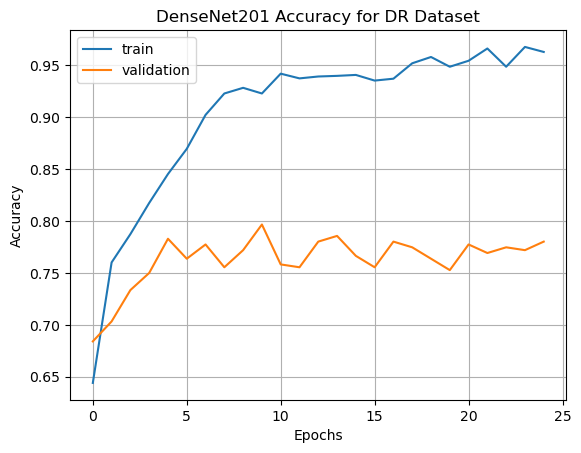

In [6]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Accuracy for DR Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

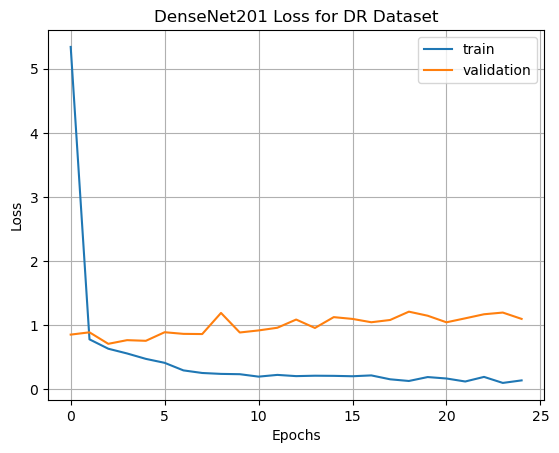

In [7]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Loss for DR Dataset')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()